# ПЛОЩАДИ

In [1]:
import subprocess
import os
import pandas as pd
import csv
import scipy as scp
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [2]:
def get_folders_dict(dictfilename):
    '''obtain all the pathes to files''' 
    folders_dict = {}
    with open (dictfilename, 'r') as f_source:
        for line in f_source:
            folder  = line.strip()
            name = folder.split('/')[-1]
            folders_dict[name] = {}
            for item in os.listdir(folder):
                if item.endswith("nods.csv"): folders_dict[name]['nods'] = folder + '/' + item
                elif item.endswith("paths.csv"): folders_dict[name]['paths'] = folder + '/' + item
                elif item.endswith("points.csv"): folders_dict[name]['points'] = folder + '/' + item
    # filter empty:
    bad_folders = []
    for item in folders_dict:
        if not folders_dict[item]: bad_folders.append(item)
    for item in bad_folders:
        del folders_dict[item]
    
    return folders_dict
  
def get_csv_dict(folders_dict):
    '''obtain all csv-s'''
    csv_dict = {}
    for item in folders_dict:
        csv_dict[item] = {}
        for jtem in folders_dict[item]:
            csv_dict[item][jtem] = pd.read_csv(folders_dict[item][jtem], encoding='cp1251')
            
    return csv_dict

In [3]:
# Rewrite ConvexHull (1)counting, (2)plotting and (3)area calculation

In [4]:
def ConvexHull_sq(csv_dict_name):  
    '''calculate convex hull area'''
    for_concat = []
    if 'nods' in csv_dict_name:
        nods_coords = csv_dict_name['nods'].filter(items=['coord_X', 'coord_Y'])
        for_concat.append(nods_coords)
    if 'points' in csv_dict_name:
        points_coords = csv_dict_name['points'].filter(items=['coord_X', 'coord_Y'])
        for_concat.append(points_coords)
        
    if not for_concat: return 0
    res = pd.concat(for_concat, ignore_index = True)
    
    plt.plot(res.coord_X, res.coord_Y, 'o')
    if len(res) <= 2: return 0
    
    hull = ConvexHull(res)
    #print(len(hull.points))
    #print(hull.vertices)
    #for hv in hull.vertices: print(res.coord_X[hv], res.coord_Y[hv])
    plt.plot(res.coord_X[hull.vertices], res.coord_Y[hull.vertices], 'r--', lw=2)
    #plt.ylim([-50,50])
    #plt.xlim([-50,50])
    for simplex in hull.simplices:
        plt.plot(res.coord_X[simplex], res.coord_Y[simplex], 'k-')
    plt.show()
    
    return (len(res), hull.area)

2017051008


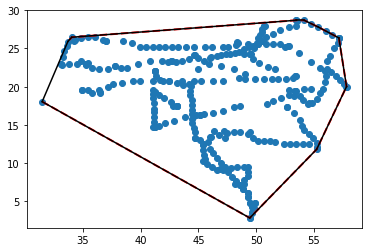

2017051009


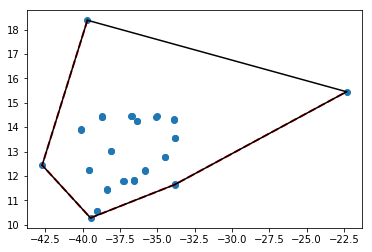

2017051028
2017051002


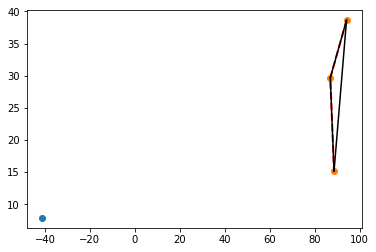

2017051003


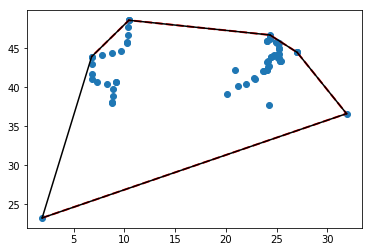

2017051001


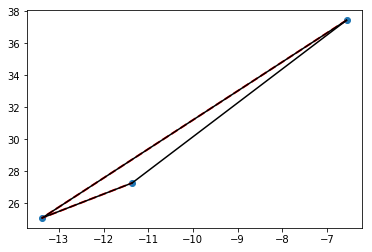

2017051006


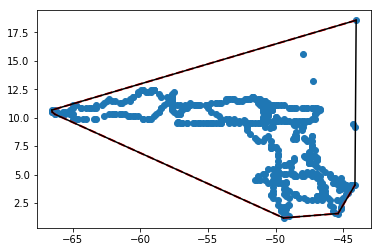

2017051007


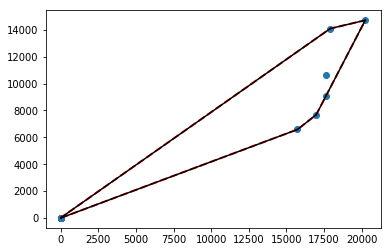

2017051004
2017051005


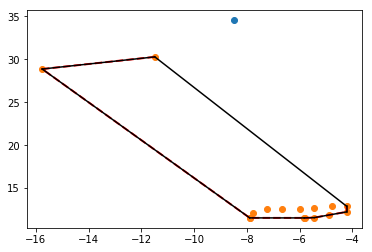

2017052050


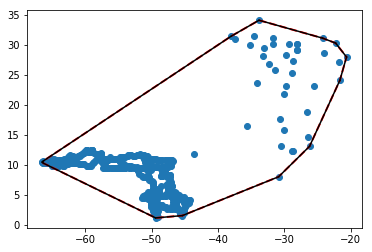

2017052051


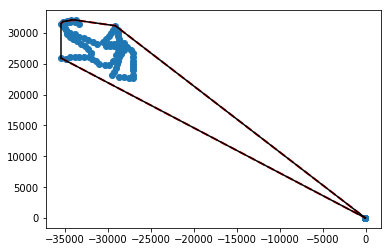

2017052052


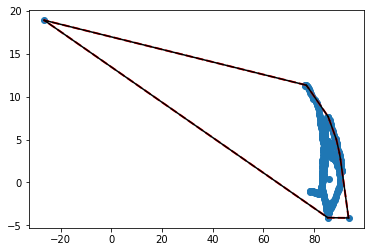

2017052053


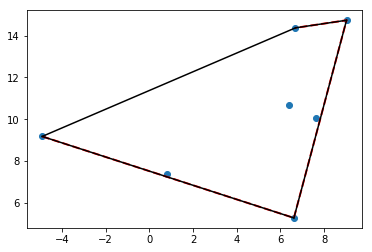

2017052054
2017052055


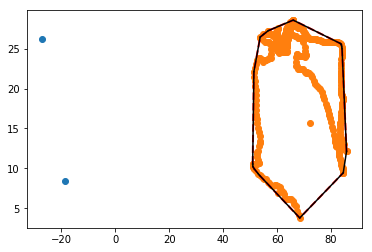

2017052058
2017050040


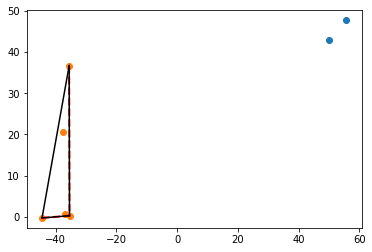

2017050042
2017051011


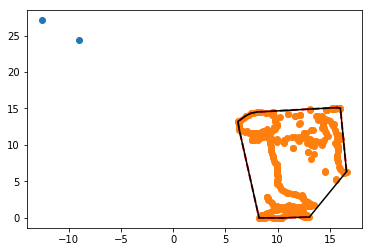

2017051010


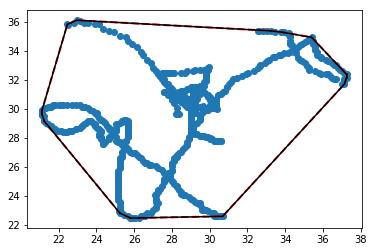

2017051013
2017051012


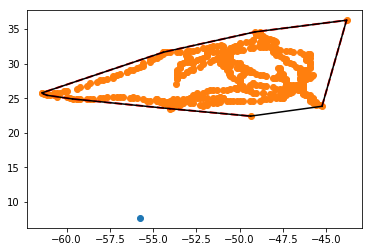

2017051015
2017051014
2017051017


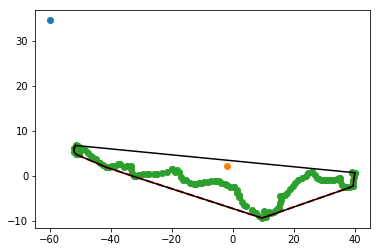

2017051016
2017050034


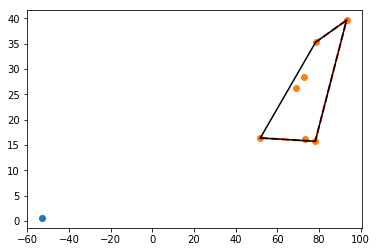

2017050035


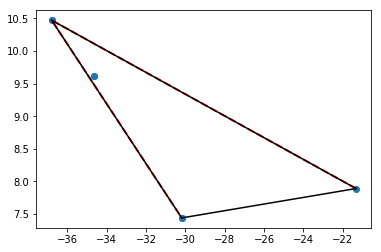

2017050036


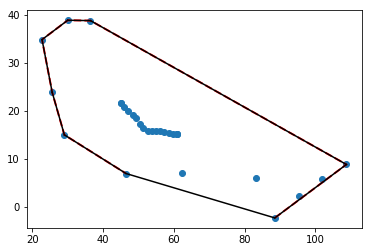

2017050037


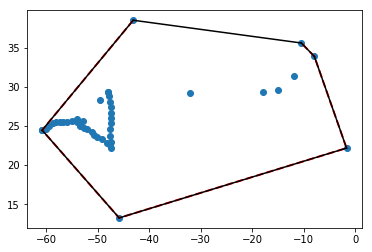

2017050030


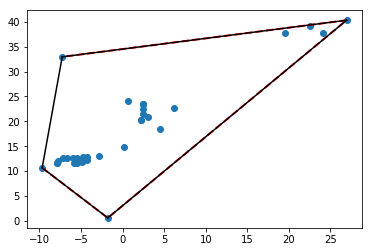

2017050031


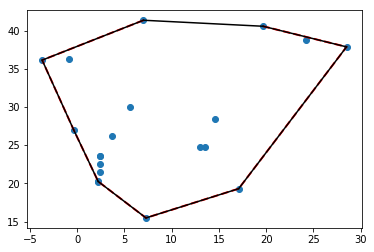

2017050032


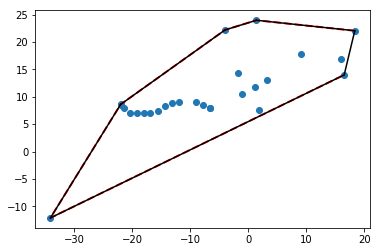

2017050033


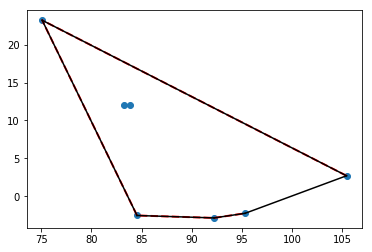

2017050038


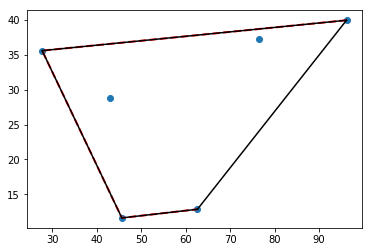

2017050039


[(3, 28.342829342139396),
 (3, 50.23384138096152),
 (5, 83.52902381153783),
 (6, 158.77894729260066),
 (7, 31.83650771560807),
 (7, 36.985189141444074),
 (7, 86.06219324041011),
 (7, 102.65853666058919),
 (16, 46.899935548474296),
 (20, 90.07685336925678),
 (27, 134.47713419747953),
 (30, 199.23526847481395),
 (33, 119.2343491899456),
 (38, 46.10505894892572),
 (45, 135.23024634176065),
 (68, 86.75593031220656),
 (83, 51645.52043622093),
 (112, 98683.18808636727),
 (134, 190.21081474591213),
 (319, 44.419010327989625),
 (321, 250.0291275704482),
 (327, 82.08986366640096),
 (487, 99.56393916498652),
 (498, 117.64731483394876),
 (499, 50.228444899394844),
 (531, 64.87326178553003),
 (611, 47.96461894235227)]

In [5]:
# CALCULATE CH AREA

#folders_dict = get_folders_dict("/home/asya/Documents/DOSANG/2017/folders_list")
folders_dict = get_folders_dict("/home/asya/Downloads/2017/folders_list")
#print (folders_dict)
csv_dict = get_csv_dict(folders_dict)
#print (csv_dict)

pairs = []

for item in csv_dict: 
    #print(csv_dict[item])
    ##print(item)
    print(item)
    csv_dict_data = ConvexHull_sq(csv_dict[item])
    if csv_dict_data!= 0:
        pairs.append(csv_dict_data)
    ##print('\n')

#pp = pairs.sort(key=lambda tup: tup[1])
sorted(pairs)

      coord_X    coord_Y
0  -39.029442  10.563545
1  -38.362258  11.453074
2  -37.250318  11.786647
3  -36.583134  11.786647
4  -35.804734  12.231412
5  -35.026335  14.455302
6  -36.360704  14.232920
7  -36.694349  14.455302
8  -38.139828  13.009818
9  -39.585412  12.231412
10 -38.695798  14.455302
11 -40.141382  13.899347
12 -33.803285  11.675456
13 -34.470365  12.787435
14 -33.803285  13.565773
15 -33.914396  14.344111
16 -39.029442  10.563545
17 -38.362258  11.453074
18 -37.250318  11.786647
19 -36.583134  11.786647
20 -35.804734  12.231412
21 -35.026335  14.455302
22 -36.360704  14.232920
23 -36.694349  14.455302
24 -38.139828  13.009818
25 -39.585412  12.231412
26 -38.695798  14.455302
27 -40.141382  13.899347
28 -33.803285  11.675456
29 -34.470365  12.787435
30 -33.803285  13.565773
31 -33.914396  14.344111


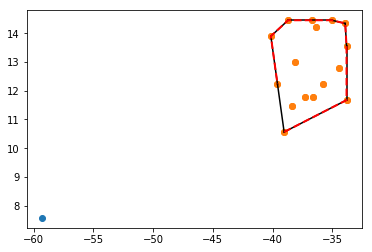

In [6]:
nods_coords = csv_dict['2017051009']['nods'].filter(items=['coord_X', 'coord_Y'])
points_coords = csv_dict['2017051009']['nods'].filter(items=['coord_X', 'coord_Y'])
res = pd.concat([nods_coords,points_coords], ignore_index = True)
print (res)
#points = [list(res.coord_X), list(res.coord_Y)]

hull = ConvexHull(res)

plt.plot(res.coord_X, res.coord_Y, 'o')
#plt.ylim([-50,50])
#plt.xlim([-50,50])
for simplex in hull.simplices:
    plt.plot(res.coord_X[simplex], res.coord_Y[simplex], 'k-')

plt.plot(res.coord_X[hull.vertices], res.coord_Y[hull.vertices], 'r--', lw=2)
plt.show()

In [7]:
pd.read_csv(folders_dict['2017050031']['points'], encoding='cp1251')

,ID,coord_X,coord_Y,date,time1,time2,beg_end,type,subtype,partner,res,comment
0,1,28.505940,37.861952,20170503,112000000,NaN,0,0,NaN,0,0,MEET
1,2,17.092784,19.299699,20170504,101100000,NaN,0,0,DP; TD,0,0,MEET; DP; крутит хвостом
2,3,5.591010,30.006418,20170504,115400000,NaN,0,0,DP,0,0,MEET; DP
3,4,-0.830811,36.275693,20170505,151300000,NaN,0,0,TSP,0,0,MEET; TSP
4,5,3.636108,26.152064,20170505,153000000,NaN,0,0,TSP,0,0,MEET; TSP
5,9,-0.385223,27.037445,20170507,92700000,NaN,0,0,UN,0,0,MEET
6,10,-3.706775,36.126418,20170507,100100000,NaN,0,0,UN,0,0,MEET; UN
7,11,19.669572,40.561686,20170507,125500000,NaN,0,0,PO,0,0,MEET; PO
8,6,2.439404,23.531218,20170506,90700000,NaN,1,2,fight; TSP,2017050030,1,START; TSP
9,7,2.248214,20.259343,20170506,90800000,NaN,3,2,fight,2017050030,1,STOP


# ТСП <-> TIME

In [8]:
import subprocess
import os
import pandas as pd
import csv
import scipy as scp
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import distance

In [9]:
weather_2017 = pd.read_csv("/home/asya/Documents/DOSANG/2017/2017_weather", delimiter='\t') ##encoding='cp1251'

In [10]:
def time_alignment(pts, nods, ts, te):
    '''find closest path points to point points;
    penalty: node gap = 3, point gap = 0, match = distance.euclidean'''
    pl, pu = 0, 3
    
    # Init alignment matrix:
    nods_t = [(0,0) for item in nods]
    al_mat = [[(0,'') for j in range(len(nods)+1)] for i in range(len(pts)+1)]
    
    al_mat[0][0] = [0, 'd']
    for i in range(1,len(pts)+1):
        al_mat[i][0] = (3*i, 'u')
    for j in range(1,len(nods)+1):
        al_mat[0][j] = (0, 'l')
        
    for i in range(1, len(pts)+1):
        for j in range(1, len(nods)+1):
            from_left = al_mat[i][j-1][0] + pl
            from_up = al_mat[i-1][j][0] + pu
            from_diag = al_mat[i-1][j-1][0] + distance.euclidean((pts[i-1][0],pts[i-1][1]),nods[j-1])
            M = max(from_left, from_up, from_diag)
            if from_left == M: al_mat[i][j] = (M, 'l')
            elif from_up == M: al_mat[i][j] = (M, 'u')
            else: al_mat[i][j] = (M, 'd')
    i,j = len(pts),len(nods)
    while (i,j) != (0,0):
        if al_mat[i][j][1] == 'l': j -= 1
        elif al_mat[i][j][1] == 'u': i -= 1
        else:
            i -= 1; j -= 1
            nods_t[j] = (pts[i][2], pts[i][3])
            
    nods_t[0], nods_t[-1] = (ts,ts), (te,te)
    return nods_t
    
def fill_gaps(nods):
    '''fill timing gaps'''
    I = []
    for i in range(len(nods)):
        if nods[i] != (0,0): I.append(i)
    for i in range(1, len(I)):
        dtime = time_to_minuts(nods[i][0]) - time_to_minuts(nods[i-1][1])
        ddots = I[i] - I[i-1]
        for k in range(I[i-1]+1, I[i]):
            kt = minuts_to_time(round(time_to_minuts(nods[i-1][1]) + dtime * ((k-I[i-1])/ddots)))
            nods[k] = (kt, kt)
    return nods

In [11]:
def find_points_on_path(x, path, points):
    timestart, timeend = int(path['timestart']), int(path['timeend'])
    date = int(path['date'])
    points_path = points[points['date'].isin([date])]
    points_path = points_path[points_path['time1'].isin(range(timestart, timeend+1, 10**5))]
    return points_path

def best_time_coord_alignment(points_zip, nods, timestart, timeend):
    nods_t = time_alignment(points_zip, nods, timestart, timeend)
    nods_t = fill_gaps(nods_t)
    return nods_t

def nods_timing(nods_path, points, timestart, timeend):
    nods_x = nods_path['coord_X'].values
    nods_y = nods_path['coord_Y'].values
    nods_c = zip(nods_x, nods_y)
    
    points = points.sort_values(by = 'time1')
    time2_pts = []
    for t1,t2 in zip(points['time1'].values, points['time2'].values):
        if np.isnan(t2): time2_pts.append(t1)
        else: time2_pts.append(int(t2))
    points_c = zip(points['coord_X'].values, points['coord_Y'].values, points['time1'].values, time2_pts)
    #print(points_c)
    
    nods_t = best_time_coord_alignment(points_c, nods_c, timestart, timeend)
    #print(nods_t, points, nods_c)
    nods_t1 = [item[0] for item in nods_t]
    nods_t2 = [item[1] for item in nods_t]
    nods_path['time1'] = pd.Series(np.array(nods_t1), index=nods_path.index)
    nods_path['time2'] = pd.Series(np.array(nods_t2), index=nods_path.index)
    return nods_path

def add_time(x, paths, nods, points):
    nods_times = []
    #print(paths)
    for _,path in paths.iterrows():
        points_path = find_points_on_path(x, path, points)
        nods_path = nods[nods['ID'].isin([int(path['ID'])])]
        nods_times.append(nods_timing(nods_path, points_path, path['timestart'], path['timeend']))
    nods_time = pd.concat(nods_times, axis=0)
    #print(nods_time)
    return nods_time

In [12]:
def get_data_day(day):
    if len(day.split('/')[0])==1: mask_day = day.split('/')[2] + '0' + day.split('/')[0]
    else: mask_day = day.split('/')[2] + day.split('/')[0]
    if len(day.split('/')[1])==1: mask_day = mask_day + '0' + day.split('/')[1]
    else: mask_day = mask_day + day.split('/')[1]
    mask_day_int = int(mask_day)    
    weather_day = weather_2017[weather_2017['дата'].isin([day])]

    folders_dict = get_folders_dict("/home/asya/Documents/DOSANG/2017/folders_list")
    csv_dict = get_csv_dict(folders_dict)
    
    data_day = {}
    
    for item in csv_dict:
        if 'paths' not in csv_dict[item].keys(): 
            print(item, 'lack of data, no paths given')
            continue
            
        paths_day = csv_dict[item]['paths'][csv_dict[item]['paths']['date'].isin([mask_day_int])]
        if paths_day.empty:
            continue
        id_day = list(paths_day['ID'])
        nods_day = csv_dict[item]['nods'][csv_dict[item]['nods']['ID'].isin(id_day)]
        
        if 'points' not in csv_dict[item].keys():
            print(item, 'lack of data, no points given')
            continue
            
        points_day = csv_dict[item]['points'][csv_dict[item]['points']['date'].isin([mask_day_int])]
        nods_day = add_time(item, paths_day, nods_day, points_day)
        
        #print(item)
        #print(nods_day)
        
        data_day[item] = (paths_day, nods_day, points_day)
    return (data_day)

def get_weather_day(day, weather_data):
    return weather_data[weather_data['дата'].isin([day])]

In [13]:
def time_to_minuts(t):
    return int(t//(10**7)*60 + (t//(10**5))%100)
def minuts_to_time(m):
    return int(m//60*(10**7) + m%60*(10**5))
def time_to_pos(t, start_p):
    return time_to_minuts(t) - start_p

In [14]:
def heat_points_day(data_day, weather):
    weather_day = {int(w['время'].split(':')[0] + w['время'].split(':')[1])*10**5 : float(w['грунт на солнцепеке']) \
                   for _,w in weather.iterrows()}
    
    type_colors = {'UN':'green','TSP':'red', 'PO':'magenta', 'O':'blue'}
    ''' DP = PO '''
    
    plt.figure(figsize = (20,10))
    
    for x in data_day:
        print(x,'\n',data_day[x][0])
        for ID in set(data_day[x][1]['ID'].values):
            cur_nods = data_day[x][1][data_day[x][1]['ID'].isin([ID])]
            #print(cur_nods)
            coord_x = cur_nods['coord_X'].values
            coord_y = cur_nods['coord_Y'].values
            plt.plot(coord_x, coord_y, '.', color = 'black')
        
        for _,pt in data_day[x][2].iterrows():
            if pt['type'] == 0:
                for beh in type_colors.keys():
                    if beh in str(pt['subtype']).replace(' ','').split(';'):
                        if pt['coord_X']>100 and -100<pt['coord_X']:
                            plt.plot([pt['coord_X']/1000],[pt['coord_Y']/1000], type_colors[beh][0]+'s')
                        else: plt.plot([pt['coord_X']],[pt['coord_Y']], type_colors[beh][0]+'s')
                        continue
        ##print(x , set(data_day[x][2][data_day[x][2]['type'].isin([0])]['subtype'].values))   
        #print(data_day[x][2])
        plt.show()
    
    #plt.show()

/home/asya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/asya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('2017051028', 'lack of data, no paths given')
('2017051029', 'lack of data, no paths given')
('2017051002', 'lack of data, no paths given')
('2017051001', 'lack of data, no paths given')
('2017051004', 'lack of data, no paths given')
('2017050040', 'lack of data, no paths given')
('2017050042', 'lack of data, no paths given')
('2017051013', 'lack of data, no paths given')
('2017051015', 'lack of data, no paths given')
('2017051014', 'lack of data, no paths given')
('2017051016', 'lack of data, no paths given')
('2017050034', 'lack of data, no paths given')
('2017050033', 'lack of data, no paths given')
('2017050038', 'lack of data, no paths given')
('2017050039', 'lack of data, no paths given')
('2017051008', '\n',    ID      date  timestart    timeend  length  comment
0   2  20170504  143400000  181100000   130.4      NaN
1   1  20170504  125300000  143400000    54.6      NaN)


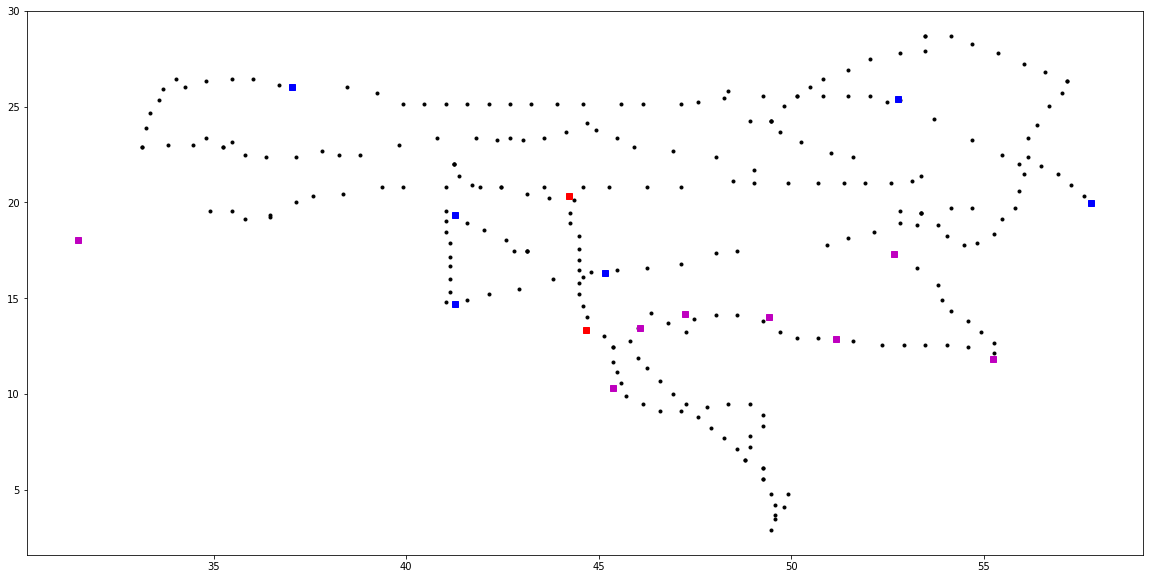

('2017051003', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  175400000  180900000    15.1      NaN)


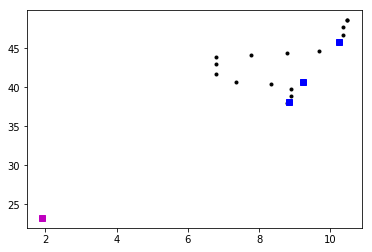

('2017051007', '\n',    ID      date  timestart    timeend  length comment
0   1  20170504  105000000  130300000    27.8     Сид
1   2  20170504  162500000  164800000    19.9    Миша)


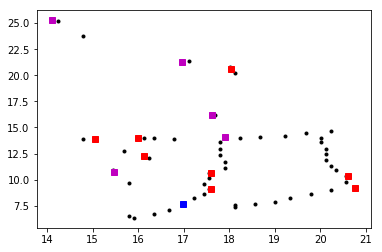

('2017050035', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  102500000  103200000     7.5      NaN)


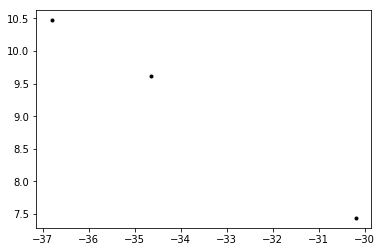

('2017050037', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  173300000  181000000    21.0      NaN)


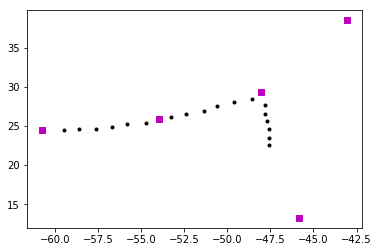

('2017051010', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  120400000  125000000    27.6      NaN)


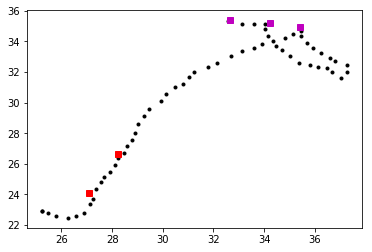

In [15]:
heat_points_day(get_data_day("5/4/2017"), get_weather_day('5/4/2017',weather_2017))

In [16]:
weather_2017[weather_2017['дата']=="5/4/2017"]

,дата,время,воздух на выс 30 см,грунт на солнцепеке,густая тень,ветер,комментарий
2,5/4/2017,9:35,34.1,40.8,29,слабый 2-3 м/с,"ясно, немного перистых облаков."
3,5/4/2017,10:30,32.0,41.1,не измер,слабый 5 м/с,"ясно, немного перистых облаков."
4,5/4/2017,11:30,38.3,49.0,33.5,слабый 2-3 м/с,"ясно, немного перистых облаков."
5,5/4/2017,12:30,34.5,43.3,31.6,слабый 3-5 м/с,"ясно, немного перистых облаков."
6,5/4/2017,13:40,34.4,50.1,30.1,слабый 3-5 м/с,"почти ясно, немного перистых облаков."
7,5/4/2017,14:30,35.0,51.3,32,слабый 3 м/с,"ясно, немного перистых облаков."
8,5/4/2017,15:30,34.0,42.7,28.8,слабый 3 м/с,"ясно, немного перистых облаков."
9,5/4/2017,16:30,30.3,37.6,25.8,слабый 2-3 м/с,"ясно, немного перистых облаков."
10,5/4/2017,17:30,29.4,31.3,25.2,слабый 2-3 м/с,"ясно, немного перистых облаков."
11,5/4/2017,18:30,24.8,28.1,24,слабый 2-3 м/с,ясно


In [17]:
def time_temperature(weather_day, h1, h2):
    weather_day = [(int(w['время'].split(':')[0] + w['время'].split(':')[1])*10**5, float(w['грунт на солнцепеке'])) \
                   for _,w in weather_day.iterrows()]
    weather_day.sort()
    
    m = h2*60 - h1*60 + 1
    tt = []

    if len(weather_day) == 0: return tt
    
    tt += [weather_day[0][1] for i in range(time_to_pos(weather_day[0][0], h1*60) + 1)]
    for i in range(1,len(weather_day)):
        dtemp = weather_day[i][1] - weather_day[i-1][1]
        dtime = time_to_minuts(weather_day[i][0]) - time_to_minuts(weather_day[i-1][0])
        tt += [weather_day[i-1][1] + dtemp*(float(j)/dtime) for j in range(1, dtime+1)]
    tt += [weather_day[-1][1] for i in range(time_to_pos(weather_day[-1][0], h1*60) + 1, m)]
    
    #plt.plot(range(m), tt, 'ro')
    #plt.show()
    return tt

#time_temperature(get_weather_day('5/4/2017',weather_2017), 9, 19)

In [18]:
def heat_paths_day(data_day, weather):
    h1, h2 = 9, 19
    weather_day = time_temperature(weather, h1, h2)
    type_colors = {'UN':'green','TSP':'red', 'PO':'magenta', 'O':'blue'}
    
    plt.figure(figsize = (20,10))
    
    tt = time_temperature(weather, h1, h2)
    #print(tt)
    print("temperature: ", max(tt), min(tt), abs(int((max(tt)-min(tt))*10)+1))
    '''from 20 to 55 C'''
    t_colors = sns.color_palette("coolwarm", (35*10)+1)
    ##t_colors = sns.color_palette("coolwarm", abs(int((max(tt)-min(tt))*10)+1))
    print(t_colors)
        
    for x in data_day:
        print(x,'\n',data_day[x][0])
        
        for ID in set(data_day[x][1]['ID'].values):
            cur_nods = data_day[x][1][data_day[x][1]['ID'].isin([ID])]
            coords = zip(cur_nods['coord_X'].values,cur_nods['coord_Y'].values,\
                         cur_nods['time1'].values)
            for k in range(len(coords)):
                nod = coords[k]
                T = time_to_minuts(nod[2]) - h1*60
                TT = tt[T]
                #print(T,TT,nod[0], nod[1], t_colors[int((TT-min(tt))*10)])
                ##plt.plot(nod[0], nod[1], '.', color = t_colors[int((TT-min(tt))*10)])
                plt.plot(nod[0], nod[1], '.', color = t_colors[int((TT-20)*10)])
            ####
            #plt.show()
            
            
        for _,pt in data_day[x][2].iterrows():
            if pt['type'] == 0:
                for beh in type_colors.keys():
                    if beh in str(pt['subtype']).replace(' ','').split(';'):
                        if pt['coord_X']>100 and -100<pt['coord_X']:
                            plt.plot([pt['coord_X']/1000],[pt['coord_Y']/1000], type_colors[beh][0]+'s')
                        else: plt.plot([pt['coord_X']],[pt['coord_Y']], type_colors[beh][0]+'s')
                        continue
            ####
        #plt.show()
        
    
    plt.show()
    

/home/asya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/asya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('2017051028', 'lack of data, no paths given')
('2017051029', 'lack of data, no paths given')
('2017051002', 'lack of data, no paths given')
('2017051001', 'lack of data, no paths given')
('2017051004', 'lack of data, no paths given')
('2017050040', 'lack of data, no paths given')
('2017050042', 'lack of data, no paths given')
('2017051013', 'lack of data, no paths given')
('2017051015', 'lack of data, no paths given')
('2017051014', 'lack of data, no paths given')
('2017051016', 'lack of data, no paths given')
('2017050034', 'lack of data, no paths given')
('2017050033', 'lack of data, no paths given')
('2017050038', 'lack of data, no paths given')
('2017050039', 'lack of data, no paths given')
('temperature: ', 51.3, 28.1, 232)
[(0.2298057, 0.298717966, 0.75368315299999999), (0.23437707945098038, 0.30554173032941179, 0.75967952758823531), (0.23894845890196079, 0.31236549465882352, 0.76567590217647052), (0.23894845890196079, 0.31236549465882352, 0.76567590217647052), (0.24351983835294

('2017051003', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  175400000  180900000    15.1      NaN)
('2017051007', '\n',    ID      date  timestart    timeend  length comment
0   1  20170504  105000000  130300000    27.8     Сид
1   2  20170504  162500000  164800000    19.9    Миша)
('2017050035', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  102500000  103200000     7.5      NaN)
('2017050037', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  173300000  181000000    21.0      NaN)
('2017051010', '\n',    ID      date  timestart    timeend  length  comment
0   1  20170504  120400000  125000000    27.6      NaN)


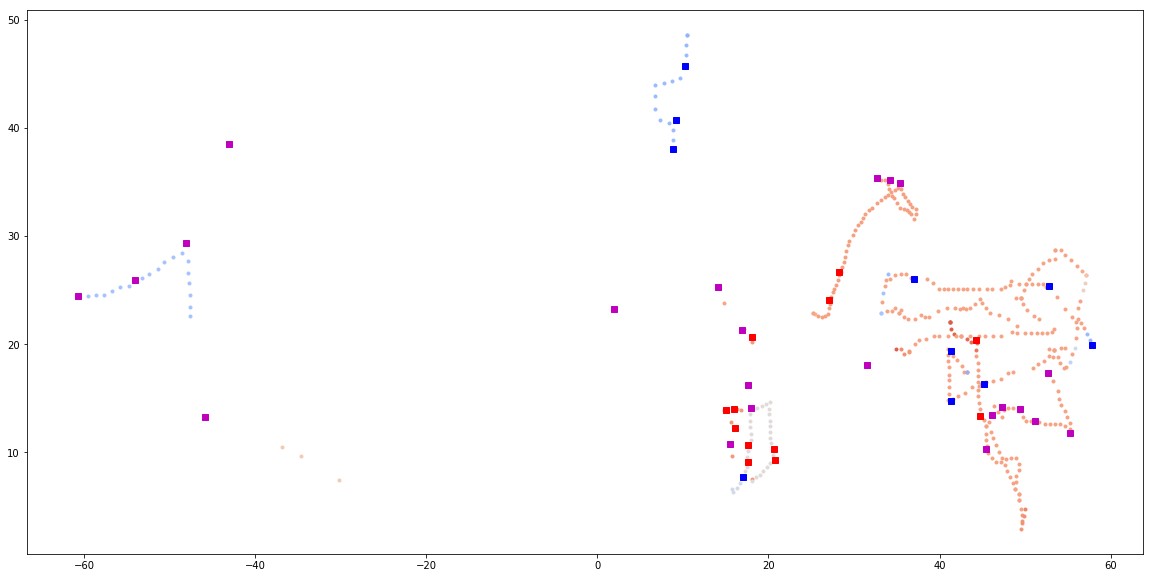

In [19]:
##for d in range(4,10):
##    dd = "5/"+str(d)+"/2017" 
##    heat_paths_day(get_data_day(dd), get_weather_day(dd,weather_2017))

dd = "5/4/2017" 
heat_paths_day(get_data_day(dd), get_weather_day(dd,weather_2017))

import seaborn as sns
#import webcolors 
colors = sns.color_palette("coolwarm", 310) ##sns.color_palette("RdBu_r", 30)
my_colors = [(int(item[0]*255),int(item[1]*255),int(item[2]*255)) for item in colors]
for i in range(310):
    #print(webcolors.rgb_to_hex(my_colors[i]))
    plt.plot(i,i, 'o', color = (colors[i]))
plt.show()

import colorsys
for i in range(101):
    rgb = colorsys.hsv_to_rgb(i / 300., 1.0, 1.0)
    print(i, [round(255*x) for x in rgb])
    plt.plot(i,i,color = [round(255*x) for x in rgb])
plt.show()

from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))
colors
for i in range(10):
    plt.plot(i,i, color = colors[i])
plt.show()